In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [2]:
df=pd.read_csv("C:/Users/rinky/Downloads/ccfd/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
distr = df['Class'].value_counts()
distr

0    284315
1       492
Name: Class, dtype: int64

In [10]:
corrtransperc = round((distr[0]/df['Class'].count()*100),2)
corrtransperc

99.83

In [11]:
fraudtransperc = round((distr[1]/df['Class'].count()*100),2)
fraudtransperc

0.17

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(283726, 31)

In [14]:
corrtrans = df[df.Class==0]
fraudtrans = df[df.Class==1]
print(corrtrans.shape) 
print(fraudtrans.shape)

(283253, 31)
(473, 31)


C:\Users\rinky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rinky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


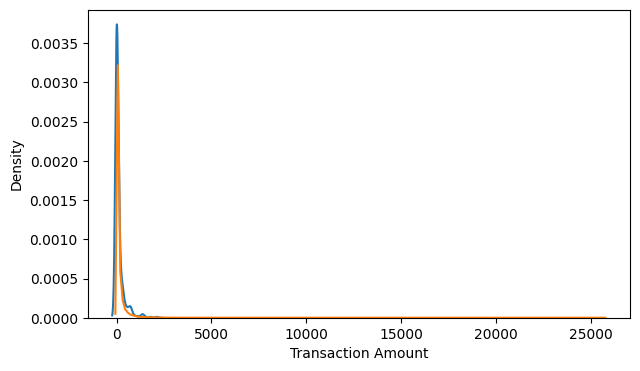

In [15]:
plt.figure(figsize=(7,4))
bargrph= sns.distplot(fraudtrans['Amount'],label='Fraudulent Transactions', hist = False)
bargrph = sns.distplot(corrtrans['Amount'],label='Credible Transactions',hist=False)
bargrph.set(xlabel='Transaction Amount')
plt.show()

In [16]:
#Histogram Analysis shows us that the density of fraudulent transactions is limited to lower ranges of amount whereas credible transactions are spread throughout the range. Comparing their statistical measures we get:

In [17]:
corrtrans.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraudtrans.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [20]:
df.drop('Time', axis=1, inplace=True)
#As time does not pose a relevant distinction between credible and fraudulent transactions

In [21]:
#In order to compare our results, accuracy won't be the clear benchmark due to imbalanced data. Therefore we will be using False Negative Rate and Recall Value to compare the models. 
#Case 1: Applying simple logistic regression model

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [38]:
x = df.drop(['Class'], axis=1)
y = df['Class']


In [39]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [40]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, stratify = y, random_state=42)
print("X AND Y:" , len(x), len(y))
print("SIZE OF TRAINING SETS:", len(x_train), len(y_train))
print("SIZE OF TESTING SETS:", len(x_test), len(y_test))
print("Total number of fraudulent transactions:", len(y.loc[df['Class'] == 1]))
print("Number of fraudulent transactions in Y train set:",len(y_train.loc[df['Class'] == 1]))
print("Number of fraudulent transactions in Y test set:",len(y_test.loc[df['Class'] == 1]))

X AND Y: 283726 283726
SIZE OF TRAINING SETS: 212794 212794
SIZE OF TESTING SETS: 70932 70932
Total number of fraudulent transactions: 473
Number of fraudulent transactions in Y train set: 355
Number of fraudulent transactions in Y test set: 118


In [57]:

logisticv01 = linear_model.LogisticRegression(max_iter=1000)


In [58]:
logisticv01.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
y_train_predict = logisticv01.predict(x_train)


Confusion matrix:
[[212408     31]
 [   129    226]]


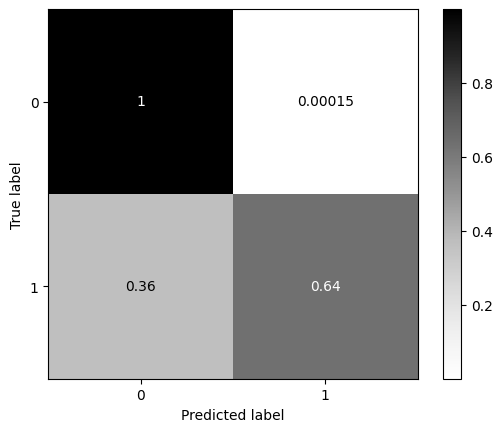

In [60]:
confusion_matrix1 = confusion_matrix(y_train, y_train_predict)
print("Confusion matrix:\n%s" % confusion_matrix1)
cm1 = ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict, normalize='true', include_values=True, cmap='Greys' )

In [61]:
TP = confusion_matrix1[1,1]
TN = confusion_matrix1[0,0]
FP = confusion_matrix1[0,1]
FN = confusion_matrix1[1,0]
print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("Accuracy: ", accuracy_score(y_train, y_train_predict))
print("Senstivity/TPR: ",TP / float(TP+FN))
print("Specificity/TNR: ", TN / float(TN+FP))
print("FPR: ", FP/float(FP+TN))
print("FNR: ", FN/float(TP+FN))
print("F1-Score: ", f1_score(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

TP= 226
TN= 212408
FP= 31
FN= 129
Accuracy:  0.9992480991005386
Senstivity/TPR:  0.6366197183098592
Specificity/TNR:  0.9998540757582176
FPR:  0.00014592424178234693
FNR:  0.36338028169014086
F1-Score:  0.738562091503268
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212439
           1       0.88      0.64      0.74       355

    accuracy                           1.00    212794
   macro avg       0.94      0.82      0.87    212794
weighted avg       1.00      1.00      1.00    212794



In [63]:
y_test_predict = logisticv01.predict(x_test)

Confusion matrix:
[[70801    13]
 [   48    70]]


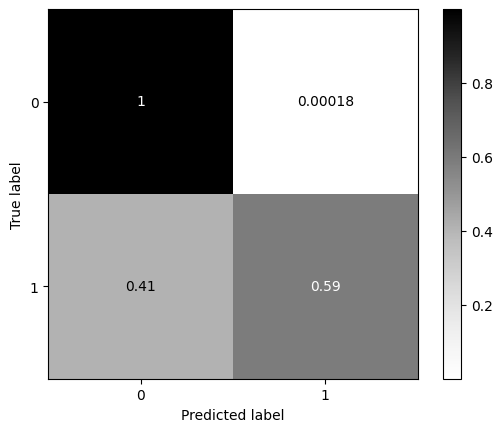

In [64]:
confusion_matrix2 = confusion_matrix(y_test, y_test_predict)
print("Confusion matrix:\n%s" % confusion_matrix2)
cm2 = ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict, normalize='true', include_values=True, cmap='Greys' )

In [65]:
TP = confusion_matrix2[1,1]
TN = confusion_matrix2[0,0]
FP = confusion_matrix2[0,1]
FN = confusion_matrix2[1,0]
print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("Accuracy: ", accuracy_score(y_test, y_test_predict))
print("Senstivity/TPR: ",TP / float(TP+FN))
print("Specificity/TNR: ", TN / float(TN+FP))
print("FPR: ", FP/float(FP+TN))
print("FNR: ", FN/float(TP+FN))
print("F1-Score: ", f1_score(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))


TP= 70
TN= 70801
FP= 13
FN= 48
Accuracy:  0.9991400214289742
Senstivity/TPR:  0.5932203389830508
Specificity/TNR:  0.9998164204818256
Precision:  0.8433734939759037
FPR:  0.0001835795181743723
FNR:  0.4067796610169492
F1-Score:  0.6965174129353234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.84      0.59      0.70       118

    accuracy                           1.00     70932
   macro avg       0.92      0.80      0.85     70932
weighted avg       1.00      1.00      1.00     70932



In [66]:
#In order to reduce the False Negative Rate(FNR) and improve Recall value of the model, we will induce SMOTE (Synthetic Minority Oversampling Technique)
#Case 2: Applying logistic relation model to SMOTE trained data

In [67]:
from imblearn.over_sampling import SMOTE

In [73]:
sm = SMOTE(random_state=42)

In [74]:
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [75]:
print("Training Set X shape before SMOTE application:", x_train.shape)
print("Training Set X shape after SMOTE application:", x_train_smote.shape)

Training Set X shape before SMOTE application: (212794, 29)
Training Set X shape after SMOTE application: (424878, 29)


In [77]:
logisticv02 = LogisticRegression(max_iter = 1000)

In [78]:
logisticv02.fit(x_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [79]:
y_train_smote_predict = logisticv02.predict(x_train_smote)

Confusion matrix:
[[208652   3787]
 [ 11860 200579]]


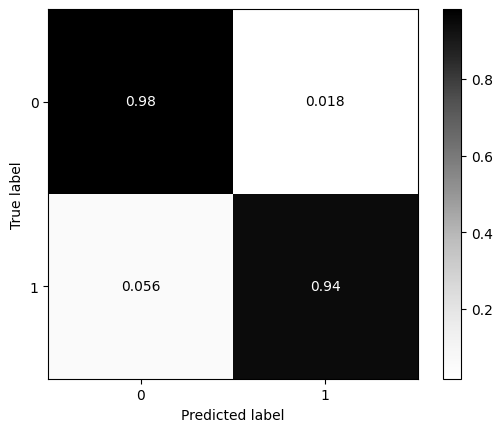

In [80]:
confusion_matrix3 = confusion_matrix(y_train_smote, y_train_smote_predict)
print("Confusion matrix:\n%s" % confusion_matrix3)
cm3 = ConfusionMatrixDisplay.from_predictions(y_train_smote, y_train_smote_predict, normalize='true', include_values=True, cmap='Greys' )

In [81]:
TP = confusion_matrix3[1,1]
TN = confusion_matrix3[0,0]
FP = confusion_matrix3[0,1]
FN = confusion_matrix3[1,0]
print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("Accuracy: ", accuracy_score(y_train_smote, y_train_smote_predict))
print("Senstivity/TPR: ",TP / float(TP+FN))
print("Specificity/TNR: ", TN / float(TN+FP))
print("FPR: ", FP/float(FP+TN))
print("FNR: ", FN/float(TP+FN))
print("F1-Score: ", f1_score(y_train_smote, y_train_smote_predict))
print(classification_report(y_train_smote, y_train_smote_predict))

TP= 200579
TN= 208652
FP= 3787
FN= 11860
Accuracy:  0.963172957884381
Senstivity/TPR:  0.9441722094342376
Specificity/TNR:  0.9821737063345243
Precision:  0.981469520370316
FPR:  0.017826293665475737
FNR:  0.055827790565762404
F1-Score:  0.9624596633917539
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    212439
           1       0.98      0.94      0.96    212439

    accuracy                           0.96    424878
   macro avg       0.96      0.96      0.96    424878
weighted avg       0.96      0.96      0.96    424878



In [82]:
y_test_smote_predict = logisticv02.predict(x_test)

Confusion matrix:
[[69511  1303]
 [   13   105]]


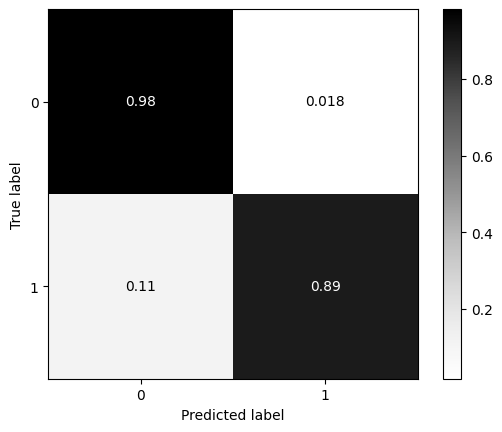

In [83]:
confusion_matrix4 = confusion_matrix(y_test, y_test_smote_predict)
print("Confusion matrix:\n%s" % confusion_matrix4)
cm4 = ConfusionMatrixDisplay.from_predictions(y_test, y_test_smote_predict, normalize='true', include_values=True, cmap='Greys' )

In [84]:
TP = confusion_matrix4[1,1]
TN = confusion_matrix4[0,0]
FP = confusion_matrix4[0,1]
FN = confusion_matrix4[1,0]
print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("Accuracy: ", accuracy_score(y_test, y_test_smote_predict))
print("Senstivity/TPR: ",TP / float(TP+FN))
print("Specificity/TNR: ", TN / float(TN+FP))
print("FPR: ", FP/float(FP+TN))
print("FNR: ", FN/float(TP+FN))
print("F1-Score: ", f1_score(y_test, y_test_smote_predict))
print(classification_report(y_test, y_test_smote_predict))

TP= 105
TN= 69511
FP= 1303
FN= 13
Accuracy:  0.981447019680821
Senstivity/TPR:  0.8898305084745762
Specificity/TNR:  0.9815996836783687
Precision:  0.07457386363636363
FPR:  0.018400316321631315
FNR:  0.11016949152542373
F1-Score:  0.13761467889908258
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70814
           1       0.07      0.89      0.14       118

    accuracy                           0.98     70932
   macro avg       0.54      0.94      0.56     70932
weighted avg       1.00      0.98      0.99     70932

